In [154]:
# # Import libraries for pre-processing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Import libraries for model selection

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [155]:
df = pd.read_csv('../Preprocessing/combined_file.csv')
df.head()

,name,position,age,club,market,club_value,AwayTeam,AwayGoals,AwayShotsOnTarget,HomeTeam,HomeGoals,HomeShotsOnTarget,FullTimeResult,HomeTeamWinStreak,AwayTeamWinStreak,HomeTeamLossStreak,AwayTeamLossStreak
0,Andreas Skov Olsen,Right Winger,24.0,Club Brugge KV,18.0,€136.85m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Anders Dreyer,Right Winger,26.0,RSC Anderlecht,15.0,€115.80m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Kasper Dolberg,Centre-Forward,26.0,RSC Anderlecht,12.0,€115.80m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Koki Machida,Centre-Back,27.0,Union Saint-Gilloise,10.0,€77.30m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Raphael Onyedika,Defensive Midfield,23.0,Club Brugge KV,10.0,€136.85m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
df.drop(['age','name', 'position', 'club', 'market'], axis=1, inplace=True)
df.columns

Index(['club_value', 'AwayTeam', 'AwayGoals', 'AwayShotsOnTarget', 'HomeTeam',
       'HomeGoals', 'HomeShotsOnTarget', 'FullTimeResult', 'HomeTeamWinStreak',
       'AwayTeamWinStreak', 'HomeTeamLossStreak', 'AwayTeamLossStreak'],
      dtype='object')

In [158]:
import pandas as pd

# Assuming your DataFrame is named 'data'

# 1. Goal difference as a feature
df['goal_difference'] = df['HomeGoals'] - df['AwayGoals']


# 4. Win streak difference (HomeTeamWinStreak - AwayTeamWinStreak)
df['win_streak_difference'] = df['HomeTeamWinStreak'] - df['AwayTeamWinStreak']

# 5. Loss streak difference (HomeTeamLossStreak - AwayTeamLossStreak)
df['loss_streak_difference'] = df['HomeTeamLossStreak'] - df['AwayTeamLossStreak']

# 6. Club value difference (assuming club value for both teams exists or can be calculated)
df['club_value_difference'] = df['club_value']  # You need separate club values for home and away

# 7. create last 10 games goal for home and away

df['HomeTeamLast10Goals'] = df['HomeGoals'] - df['HomeGoals'].shift(10)

df['AwayTeamLast10Goals'] = df['AwayGoals'] - df['AwayGoals'].shift(10)

# 8. create last 10 games win for home and away

df['HomeTeamLast10Wins'] = df['HomeTeamWinStreak'] - df['HomeTeamWinStreak'].shift(10)
df['AwayTeamLast10Wins'] = df['AwayTeamWinStreak'] - df['AwayTeamWinStreak'].shift(10)

# 9. create club value for home and away

df['HomeTeamClubValue'] = df['club_value']  # Replace this with actual home team club values if available
df['AwayTeamClubValue'] = df['club_value']  # Replace this with actual away team club values if available



# If 'club_value' is only present for one team, you could modify this to make it more meaningful.

# Check the df_imputedFrame to ensure features have been added
df.head()

,club_value,AwayTeam,AwayGoals,AwayShotsOnTarget,HomeTeam,HomeGoals,HomeShotsOnTarget,FullTimeResult,HomeTeamWinStreak,AwayTeamWinStreak,...,goal_difference,win_streak_difference,loss_streak_difference,club_value_difference,HomeTeamLast10Goals,AwayTeamLast10Goals,HomeTeamLast10Wins,AwayTeamLast10Wins,HomeTeamClubValue,AwayTeamClubValue
0,€136.85m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,€136.85m,NaN,NaN,NaN,NaN,€136.85m,€136.85m
1,€115.80m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,€115.80m,NaN,NaN,NaN,NaN,€115.80m,€115.80m
2,€115.80m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,€115.80m,NaN,NaN,NaN,NaN,€115.80m,€115.80m
3,€77.30m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,€77.30m,NaN,NaN,NaN,NaN,€77.30m,€77.30m
4,€136.85m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,€136.85m,NaN,NaN,NaN,NaN,€136.85m,€136.85m


In [159]:

import os
import pickle
from sklearn.preprocessing import LabelEncoder

# Initialize dictionary to store multiple LabelEncoders
label_encoders = {}

def encode_categorical_features(df):
    for column in df.columns:
        if df[column].dtype == 'object':
            le = LabelEncoder()
            df[column] = le.fit_transform(df[column])
            label_encoders[column] = le  # Store the encoder for the column
    return df

# Encode the features
df_encoded = encode_categorical_features(df)

# Define the path and filename
path = '../Streamlit/'
filename = 'label_encoders.pkl'  # Naming the file appropriately for multiple encoders
file_path = os.path.join(path, filename)

# Save the label encoders dictionary
with open(file_path, 'wb') as f:
    pickle.dump(label_encoders, f)

print(f"Encoders saved to {file_path}")


Encoders saved to ../Streamlit/label_encoders.pkl


In [160]:
# Load the label encoders
with open(file_path, 'rb') as f:
    loaded_label_encoders = pickle.load(f)

# Print the keys to see what encoders are available
print("Keys in loaded_label_encoders:", loaded_label_encoders.keys())



Keys in loaded_label_encoders: dict_keys(['club_value', 'AwayTeam', 'HomeTeam', 'FullTimeResult', 'club_value_difference', 'HomeTeamClubValue', 'AwayTeamClubValue'])


In [161]:
df_encoded.columns

Index(['club_value', 'AwayTeam', 'AwayGoals', 'AwayShotsOnTarget', 'HomeTeam',
       'HomeGoals', 'HomeShotsOnTarget', 'FullTimeResult', 'HomeTeamWinStreak',
       'AwayTeamWinStreak', 'HomeTeamLossStreak', 'AwayTeamLossStreak',
       'goal_difference', 'win_streak_difference', 'loss_streak_difference',
       'club_value_difference', 'HomeTeamLast10Goals', 'AwayTeamLast10Goals',
       'HomeTeamLast10Wins', 'AwayTeamLast10Wins', 'HomeTeamClubValue',
       'AwayTeamClubValue'],
      dtype='object')

In [143]:
'''import pandas as pd

# Assuming your DataFrame is named 'data'

# 1. Goal difference as a feature
df_encoded['goal_difference'] = df_encoded['HomeGoals'] - df_encoded['AwayGoals']


# 4. Win streak difference (HomeTeamWinStreak - AwayTeamWinStreak)
df_encoded['win_streak_difference'] = df_encoded['HomeTeamWinStreak'] - df_encoded['AwayTeamWinStreak']

# 5. Loss streak difference (HomeTeamLossStreak - AwayTeamLossStreak)
df_encoded['loss_streak_difference'] = df_encoded['HomeTeamLossStreak'] - df_encoded['AwayTeamLossStreak']

# 6. Club value difference (assuming club value for both teams exists or can be calculated)
df_encoded['club_value_difference'] = df_encoded['club_value']  # You need separate club values for home and away

# 7. create last 10 games goal for home and away

df_encoded['HomeTeamLast10Goals'] = df_encoded['HomeGoals'] - df_encoded['HomeGoals'].shift(10)

df_encoded['AwayTeamLast10Goals'] = df_encoded['AwayGoals'] - df_encoded['AwayGoals'].shift(10)

# 8. create last 10 games win for home and away

df_encoded['HomeTeamLast10Wins'] = df_encoded['FullTimeResult'] - df_encoded['FullTimeResult'].shift(10)
df_encoded['AwayTeamLast10Wins'] = df_encoded['FullTimeResult'] - df_encoded['FullTimeResult'].shift(10)

# 9. create club value for home and away

df_encoded['HomeTeamClubValue'] = df_encoded['club_value']  # Replace this with actual home team club values if available
df_encoded['AwayTeamClubValue'] = df_encoded['club_value']  # Replace this with actual away team club values if available



# If 'club_value' is only present for one team, you could modify this to make it more meaningful.

# Check the df_imputedFrame to ensure features have been added
df_encoded.head()'''


"import pandas as pd\n\n# Assuming your DataFrame is named 'data'\n\n# 1. Goal difference as a feature\ndf_encoded['goal_difference'] = df_encoded['HomeGoals'] - df_encoded['AwayGoals']\n\n\n# 4. Win streak difference (HomeTeamWinStreak - AwayTeamWinStreak)\ndf_encoded['win_streak_difference'] = df_encoded['HomeTeamWinStreak'] - df_encoded['AwayTeamWinStreak']\n\n# 5. Loss streak difference (HomeTeamLossStreak - AwayTeamLossStreak)\ndf_encoded['loss_streak_difference'] = df_encoded['HomeTeamLossStreak'] - df_encoded['AwayTeamLossStreak']\n\n# 6. Club value difference (assuming club value for both teams exists or can be calculated)\ndf_encoded['club_value_difference'] = df_encoded['club_value']  # You need separate club values for home and away\n\n# 7. create last 10 games goal for home and away\n\ndf_encoded['HomeTeamLast10Goals'] = df_encoded['HomeGoals'] - df_encoded['HomeGoals'].shift(10)\n\ndf_encoded['AwayTeamLast10Goals'] = df_encoded['AwayGoals'] - df_encoded['AwayGoals'].shift(

In [162]:
# fill missing values 

from sklearn.impute import KNNImputer

def fill_missing_values(df):
    imputer = KNNImputer(n_neighbors=50)
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    return df_imputed

df_imputed = fill_missing_values(df)

In [163]:
df_imputed.columns

Index(['club_value', 'AwayTeam', 'AwayGoals', 'AwayShotsOnTarget', 'HomeTeam',
       'HomeGoals', 'HomeShotsOnTarget', 'FullTimeResult', 'HomeTeamWinStreak',
       'AwayTeamWinStreak', 'HomeTeamLossStreak', 'AwayTeamLossStreak',
       'goal_difference', 'win_streak_difference', 'loss_streak_difference',
       'club_value_difference', 'HomeTeamLast10Goals', 'AwayTeamLast10Goals',
       'HomeTeamLast10Wins', 'AwayTeamLast10Wins', 'HomeTeamClubValue',
       'AwayTeamClubValue'],
      dtype='object')

In [164]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming your df_imputed is in the 'data' DataFrame and includes the required columns

# Remove direct result-determining variables
features = ['AwayTeam', 'AwayShotsOnTarget', 'HomeTeam', 
            'HomeShotsOnTarget', 'HomeTeamWinStreak', 'AwayTeamWinStreak', 
            'HomeTeamLossStreak', 'AwayTeamLossStreak', 'win_streak_difference', 
            'loss_streak_difference', 'club_value_difference', 
            'HomeTeamLast10Goals', 'AwayTeamLast10Goals','HomeTeamLast10Wins', 'AwayTeamLast10Wins','HomeTeamClubValue',
       'AwayTeamClubValue']

# 1. Encode categorical features (e.g., HomeTeam, AwayTeam)
le = LabelEncoder()
df_imputed['HomeTeam'] = le.fit_transform(df_imputed['HomeTeam'])
df_imputed['AwayTeam'] = le.fit_transform(df_imputed['AwayTeam'])

# 2. Define the features (X) and the target (y)
X = df_imputed[features]
y = df_imputed['FullTimeResult']  # Target (what we're predicting)

# 3. Split the df_imputed into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = model.predict(X_test)

# 6. Evaluate the model performance
print("Model Performance Report:")
print(classification_report(y_test, y_pred))



Model Performance Report:
              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68       353
         1.0       0.39      0.31      0.34       316
         2.0       0.73      0.83      0.78       583
         3.0       1.00      1.00      1.00        26

    accuracy                           0.66      1278
   macro avg       0.70      0.70      0.70      1278
weighted avg       0.64      0.66      0.65      1278



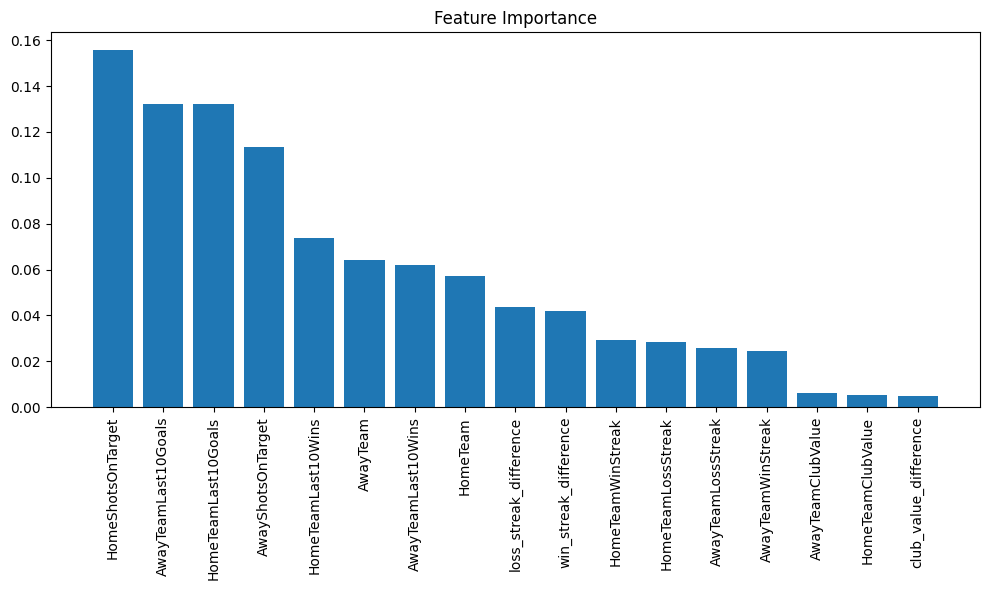

Cross-validation accuracy scores: [0.65492958 0.67057903 0.66718872 0.66953798 0.66953798]
Mean cross-validation accuracy: 0.6663546580098358
Standard deviation of cross-validation accuracy: 0.005819630924445988


In [165]:
# Checking overfitting  

import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
feature_importances = model.feature_importances_

# Plot feature importances
features = X.columns
indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()


from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X, y, cv=5)
print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")
print(f"Standard deviation of cross-validation accuracy: {cv_scores.std()}")

C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


XGBoost: 0.68
Random Forest: 0.66
Gradient Boosting: 0.68
SVM: 0.67
Logistic Regression: 0.67
K-Nearest Neighbors: 0.54


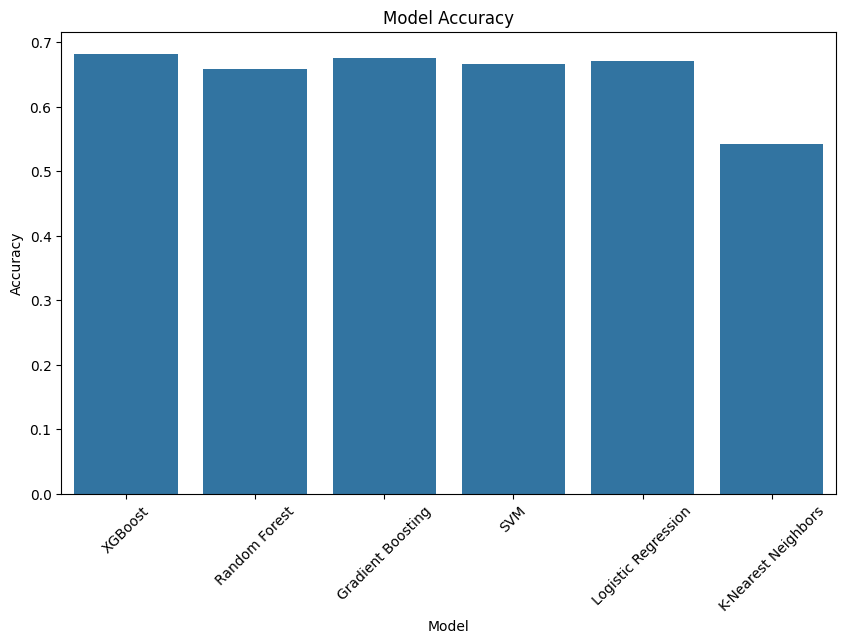

In [166]:
# Try other models

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import os
from xgboost import XGBClassifier


# Create the models

models = {
    'XGBoost': XGBClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'Logistic Regression': LogisticRegression(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Create a dictionary to store the accuracy of each model
accuracy_dict = {}

# Loop through each model

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_dict[name] = accuracy

# Print the accuracy of each model

for name, accuracy in accuracy_dict.items():
    print(f'{name}: {accuracy:.2f}')


# Plot the accuracy of each model

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_dict.keys()), y=list(accuracy_dict.values()))
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.show()

# save the model to pkl file

import pickle

# Save the best model to Streamlit folder

best_model = max(accuracy_dict, key=accuracy_dict.get)
model = models[best_model]


In [84]:
'''from sklearn.model_selection import GridSearchCV

# Define a grid of hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters
print(f"Best parameters: {grid_search.best_params_}")

# Retrain with best params if desired
best_model = grid_search.best_estimator_
'''

'from sklearn.model_selection import GridSearchCV\n\n# Define a grid of hyperparameters\nparam_grid = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [10, 20, 30, None],\n    \'min_samples_split\': [2, 5, 10]\n}\n\n# Perform grid search\ngrid_search = GridSearchCV(model, param_grid, cv=5)\ngrid_search.fit(X_train, y_train)\n\n# Best parameters\nprint(f"Best parameters: {grid_search.best_params_}")\n\n# Retrain with best params if desired\nbest_model = grid_search.best_estimator_\n'

In [167]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Assuming the same features and data
features = ['AwayTeam', 'AwayShotsOnTarget', 'HomeTeam', 
            'HomeShotsOnTarget', 'HomeTeamWinStreak', 'AwayTeamWinStreak', 
            'HomeTeamLossStreak', 'AwayTeamLossStreak', 'win_streak_difference', 
            'loss_streak_difference', 'club_value_difference', 
            'HomeTeamLast10Goals', 'AwayTeamLast10Goals','HomeTeamLast10Wins', 'AwayTeamLast10Wins','HomeTeamClubValue',
       'AwayTeamClubValue']
# Encode categorical features (if necessary)
le = LabelEncoder()
df_imputed['HomeTeam'] = le.fit_transform(df_imputed['HomeTeam'])
df_imputed['AwayTeam'] = le.fit_transform(df_imputed['AwayTeam'])

# Define the features (X) and the target (y)
X = df_imputed[features]
y = df_imputed['FullTimeResult']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the dataset into DMatrix for XGBoost
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

# Define XGBoost parameters
xgb_params = {
    'objective': 'multi:softmax',  # Use softmax for classification
    'num_class': len(y.unique()),  # Number of classes
    'max_depth': 10,               # Maximum depth of trees
    'learning_rate': 0.1,          # Step size shrinkage
    'n_estimators': 100,           # Number of boosting rounds
    'subsample': 0.8,              # Subsample ratio of the training instance
    'colsample_bytree': 0.8,       # Subsample ratio of columns when constructing each tree
    'seed': 42
}

# Train the XGBoost model
xgb_model = xgb.train(params=xgb_params, dtrain=train_dmatrix, num_boost_round=100)

# Make predictions on the test set
y_pred = xgb_model.predict(test_dmatrix)

# Evaluate the model performance
print("XGBoost Model Performance Report:")
print(classification_report(y_test, y_pred))

# Save the best model to the specified path
path = '../Streamlit/'
filename = f'{best_model}.pkl'
file_path = os.path.join(path, filename)

# Save the model
with open(file_path, 'wb') as f:
    pickle.dump(model, f)

print(f"Model saved to {file_path}")


C:\Users\pieta\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [14:54:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model Performance Report:
              precision    recall  f1-score   support

         0.0       0.71      0.69      0.70       353
         1.0       0.46      0.39      0.42       316
         2.0       0.74      0.83      0.78       583
         3.0       1.00      1.00      1.00        26

    accuracy                           0.68      1278
   macro avg       0.73      0.73      0.73      1278
weighted avg       0.67      0.68      0.68      1278

Model saved to ../Streamlit/XGBoost.pkl


In [125]:
features

['club_value',
 'AwayTeam',
 'AwayShotsOnTarget',
 'HomeTeam',
 'HomeShotsOnTarget',
 'HomeTeamWinStreak',
 'AwayTeamWinStreak',
 'HomeTeamLossStreak',
 'AwayTeamLossStreak',
 'win_streak_difference',
 'loss_streak_difference',
 'club_value_difference',
 'HomeTeamLast10Goals',
 'AwayTeamLast10Goals',
 'HomeTeamLast10Wins',
 'AwayTeamLast10Wins',
 'HomeTeamClubValue',
 'AwayTeamClubValue']